In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones para que funcionen las demas 

In [6]:
# Funcion de la que me tomo mas tiempo hacerlo 
def gauss(a,b):
    '''Funcion que retorna un array "x" despues de hacer una eliminacion de Gauss con pivoteo'''
    
    n = a.shape[0]
    # https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.html
    # estamos creando un matriz columna 
    x = np.ndarray( shape=(n,1), dtype = np.float64 )   
    a_copy = a.copy() # con el fin de hacer segumiento a la matriz al final . 
    s = [] # lista para alojar los valores maximos (es parte del pivoteo)
    l = [] # usada para reordenar como se hara la eliminacion
    
    # #### LLENAMOS LA LISTA "S" CON LOS VALORES MAXIMOS  #######
    for i in range(0,n):
        l.append(i) # vamos agregando .Establecemos esta matriz
        smax = 0 # el maximo de una fila es importante para el pivote
        for j in range(0,n):
            # se escoje el maximo entre todos los elemnos de una fila
            smax = max(smax,abs(a[i][j])) 
            
        s.append(smax) # alojamos el maximo de la fila
    
    # ---------- print('l inicial ' ,l) (SEGUIMIENTO)
    # --------- print('s inicial ', s) (SEGUIMIENTO)
    
    # ##### PIVOTEO(ESCOJEMOS LA FILAS PIVOTES Y ELIMINAMOS) #########
    # k hace referencia a la columna donde se hara ceros seran creados en el array a_ij
    # Pero recuerda que los ceros no se crean realmente . Por que en esos espacios almacenamos 
    # otras cosas(los multiplicadorese para descomposicion LU) . 
    for k in range(0,n-1):
        
        rmax = 0 
        # ##### SE ESCOJE LA FILA PIVOTE EN ESTE BLOQUE #########
        for i in range (k,n):
            
            # esto es para escoger la correcta fila pivote
            # se esta dividiendo (elemnto de columna k y fila [k-n][k])/los Smax
            r = abs( a[l[i]][k] / s[l[i]] )
            if (r > rmax):
                # j = i es para escoger el correcto pivote
                # rmax = r es para escoger la maxima proporcion(ratio)
                rmax,j = r,i
                # al final no usaremos rmax , solo es necesario para detener el if cuando sea necesario
              
        l[j],l[k] = l[k],l[j] # luego se cambia el lugar donde ocurre el maximo proporcion
        
        
        # ####### ELIMINACION GAUSSIANA PERO LA FILA PIVOTE LO DETERMINA "l" ################## 
        for i in range(k+1,n):
            xmult = a[l[i]][k]/a[l[k]][k]
            a[l[i]][k] = xmult # los guardo para fines de LU y para eliminar "b"
            
            a_copy[l[i]][k] -= xmult*a[l[k]][k] # para hacer segumiento(se puede borrar) 
            
            # este for hara segumiento de que se haga operaciones en toda la fila que no es pivot
            for j in range(k+1,n):
                a[l[i]][j] -= xmult*a[l[k]][j]
                a_copy[l[i]][j] -= xmult*a[l[k]][j] # para hacer seguimiento(se puede borrar)
    
    # --------- print('l final ' ,l) (SEGUIMIENTO)
    # --------- print('a final copy \n' , a_copy) (SEGUIMIENTO)
    # ##### SEGIMOS PIVOTEANDO PERO PARA LA MATRIZ b###   
    for k in range(0,n-1):
        
        # recuerda el que ahora maneja el orden sera la lista "l"
        # debemos hacer las operaciones en el mismo orden que hemos hecho para "a"
        for i in range(k+1,n):
            b[l[i]] -= a[l[i]][k]*b[l[k]]
            
    #------ print('b final \n ' , b) (SEGUIMIENTO)
    
    # ######### AHORA HACEMOS LA SUSTITUCION BACKWARD ##########
    
    # espero se entienda por que -1 . Es por la cuenta por cero
    x[n-1] = b[l[n-1]]/a[l[n-1]][n-1]
    
    for i in range(n-2,-1,-1):
        summ = b[l[i]]
        for j in range(i+1,n):
            summ -= a[l[i]][j]*x[j]
            
        x[i] = summ/a[l[i]][i]
        
        
    return x


def RK4_system(F=None,t0=0,X0=0,limsup=0,nstep=10):
    '''
    Funcion que recibe como argumentos 
    - F = funcion de Rn+1-> Rn F(X,t)
    - t0,X0 = condicion inicial (valor inicial) X0 es una matriz columna de orden "n"
    - limsup = hasta donde se quiere hacer la prediccion
    - nstep = numero de pasos
    Y restorna un array de n+1 dimensiones , donde en cada fila el primer elemento es el tiempo y los restantes son los valores predichos en ese tiempo
    Si se desea tener por columnas podrias usar retornar la transpuesta de la matriz (OJO) . 
    '''
    h = (limsup-t0)/nstep
    t = t0
    X = np.array(X0,dtype=np.float64)
    # https://numpy.org/doc/stable/reference/generated/numpy.insert.html ( documentacion )
    valor_inicio = np.insert(X,0,t) # lo que hace es crear una copia de X y aumentarle al inicio el "t" 
    cal_valores = []
    cal_valores.append(valor_inicio) # agregamos la parte inicial 
    for i in range(0,nstep):
        K1 = F(t,X)
        K2 = F(t+1/2*h,X+1/2*K1*h)
        K3 = F(t+1/2*h,X+1/2*K2*h)
        K4 = F(t+1/2*h,X+1/2*K3*h)
        t = t0 + (i+1)*h
        X = X + 1/6*(K1+ 2*K2+ 2*K3 + K4)*h
        valor_calculado = np.insert(X,0,t) # lo que hace es crear una copia de X y aumentarle al inicio el "t" 
        cal_valores.append(valor_calculado) # agregamos la parte inicial 
        
    lista_resultados = np.array(cal_valores,dtype=np.float64)
    return lista_resultados # aca puedes retornar esto o su transpuesta

# Aca intentare compactar la condicion de dirichlet con newman 

<img src="diriclet_lineal.png">

<img src="contorno_general.png">

In [7]:
# solo copiar ,pegar y modificar ciertos detalles . Que esta facil hacerlo 
def sol_EDO_Diri_or_New(u=None,v=None,w=None,ta=1,alpha=0,tb=2,beta=0,n=99,tipo="dirichlet",analitic_solution=None):
    '''
    Se quiere resolver la ecuacion diff2x = u(t) + v(t)x + w(t)diff1x para eso se le pasa
    - u,v,t son funciones de R-> R que deben ser pasadas si o si 
    - n = es el numero de pasos entre , pero debes tener en mente que en el paso 0 se tiene "ta" y en el paso "n" se tiene "tb"
     Asi por ejemplo si quieres 100 puntos para dividir el dominio de "ta" a "tb" debes poner n=99. 
    - Se debe saber que las condicioones depende ,
        - dirichlet : x(ta) = alpha , x(tb) = beta
        - newman_left : x'(ta) = alpha , x(tb) = beta
        - newman_right : x(ta) = alpha , x'(tb) = beta
        - newman_both : x'(ta) = alpha , x'(tb) = beta
    - analitic_solution = Es la solucion analitica (optional) si se conoce
    
    Esta funcion retornara si se tiene la solucion analitica , Una lista de 4 fila donde la primera fila 
    se muestra los puntos donde se predice , la segunda fila los valores predichos , tercero los valores analiticos 
    y cuarto el error . Si no se tiene la solucion analitica , es decir "analitic_solution=None", solo se pasa dos filas 
    '''
    h = (tb-ta)/n # el tamaño del paso esta determinado por los extremos el numero de pasos "n"
    
    ########## armamos el espacio para los elementos la matriz (n+1) x (n+1) 
    # recuerda que queremos en general predecir los 100 puntos repartidos entre ta y tb ( a veces no se sabe x(ta) y x(tb) )
    a = np.ndarray( shape=(n+1), dtype = np.float64 )
    b = np.ndarray( shape=(n+1), dtype = np.float64 )
    c = np.ndarray( shape=(n+1), dtype = np.float64 )
    d = np.ndarray( shape=(n+1), dtype = np.float64 )
    A = np.zeros( shape=(n+1,n+1), dtype = np.float64 )
    # esto se usara para almacenar los resultados / primera fila sera los ti donde se predice 
    # / segunda fila sera los x(ti) predichos / tercera fila sera los reales / cuarta fila el error 
    resultado = [] 
    
    ############# LLenamos los elemenos de nuestra matrices 
    # estos elementos salen de forma natural cuando se forma las matrices a mano 
    for i in range(0,n+1):
        t = ta + (i)*h # el i+1 es necesario por el contador de range que toma desde el cero
        a[i] = -(1+(h/2)*w(t))
        b[i] = -h**2*u(t)
        c[i] = -(1-(h/2)*w(t))
        d[i] = 2+h**2*v(t)
    
    # llenamos la matriz 
    if tipo=="dirichlet" or tipo == "newman_right":
        A[0][0] = 1
        b[0] = alpha
    elif tipo == "newman_left" or tipo == "newman_both":
        A[0][0] = d[0]
        A[0][1] = c[0] + a[0]
        b[0] = b[0] + 2*h*alpha*a[0]
    
    for k in range(1,n):
        A[k][k] = d[k] # llenamos la diagonal 
    for k in range(1,n):
        A[k][k+1] = c[k] # llenamos la parte diagonal superiror de la banda tridiagonal
    for k in range(1,n):
        A[k][k-1] = a[k] # llenamos la parte diagonal inferior de la banda tridiagonal

    if tipo=="dirichlet" or tipo == "newman_left":
        A[n][n] = 1
        b[n] = beta 
    elif tipo == "newman_right" or tipo == "newman_both":
        A[n][n] = d[n]
        A[n][n-1] = c[n] + a[n]
        b[n] = b[n] - 2*h*beta*c[n]
    #### Resolvemos la matriz 
    X = (gauss(A,b)).T # va a retornar una matriz columna de orden 1xn+1 / el .T es para devolver transpuesta
    
    # agregamso a la lista resultado los puntos evaluados 
    puntos = []
    for i in range(0,n+1):
        puntos.append(ta+i*h)
    resultado.append(puntos)
    
    resultado.append(X[0]) # agregamos los resultados predichos , el [0] es debido a que es una matriz 1x(n+1) 
    
    # ahora si tenemos la solucion analitica entonces es conveniente retornar no solo el resultado sino tambien 
    # su comparacion con los valores analiticos y su error 
    if analitic_solution != None:
        analitic_solucion = [] # para almacenar las soluciones analiticas
        lista_error = [] # Para almacenar las soluciones analiticas
        
        # puntos inicial e intermedios
        for i in range(0,n+1):
            t = ta + (i)*h
            analitico = analitic_solution(t)
            error = analitico - X[0][i] # hallamos el error
            analitic_solucion.append(analitico)
            lista_error.append(error)

        resultado.append(analitic_solucion)
        resultado.append(lista_error)
    
    # retornamos 
    return np.array(resultado,dtype=np.float64)  

### Probamos con condiciones de dirichlet 

In [8]:
# Probemos si nuesta funcion trabaja 
'''
Queremos resolver el problema diff2x = e^{t} - 3sin(t) + diff1x - x 
con x(1) = 1.09737 491 y x(2) = 8.63749 661 y tomar 100 puntos incluyendo a y b
--- Por lo tanto estos son nuestros parametros 
- u(t) = e^(t) - 3sin(t)
- v(t) = -1
- w(t) = 1
- n=99
- ta = 1 , alpha = 1.09737 491 , tb = 2 , beta = 8.63749 661 
'''
def upara(t):
    return np.float64(np.e**(t)-3*np.sin(t))
def vpara(t):
    return np.float64(-1)
def wpara(t):
    return np.float64(1)
def analitico(t):
    return np.float64(np.e**(t)-3*np.cos(t))

resultado1 = sol_EDO_Diri_or_New(u=upara,v=vpara,w=wpara,ta=1,alpha=1.09737491,tb=2,beta=8.63749661,n=4,tipo="dirichlet",
                           analitic_solution=analitico)
resultado1[0],resultado1[1] ,resultado1[2] 

(array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
 array([1.09737491, 2.54494201, 4.2702745 , 6.28991125, 8.63749661]),
 array([1.09737491, 2.54437587, 4.26947747, 6.28934084, 8.63749661]))

### Ahora probare con condiciones de newman - right 

In [9]:
# Probemos si nuesta funcion trabaja 
'''
Queremos resolver el problema diff2x = 4*t - 4*diff1x
con x(0) = 0 y x(\pi/2) = 0 y tomar 11 puntos incluyendo a y b
--- Por lo tanto estos son nuestros parametros 
- u(t) = 4*t
- v(t) = -4
- w(t) = ''
- n=10
- ta = 0 , alpha = 0 , tb = pi/2 , beta = 0
'''
def upara(t):
    return np.float64(4*t)
def vpara(t):
    return np.float64(-4)
def wpara(t):
    return np.float64(0)
def analitico(t):
    return np.float64(t+(1/2)*np.sin(2*t))

resultado1 = sol_EDO_Diri_or_New(u=upara,v=vpara,w=wpara,ta=0,alpha=0,tb=np.pi/2,beta=0,n=5,tipo="newman_right",
                           analitic_solution=analitico)
resultado1[0],resultado1[1] ,resultado1[2] 

(array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
        1.57079633]),
 array([0.        , 0.62877912, 1.1333513 , 1.43854454, 1.54789847,
        1.54226701]),
 array([0.        , 0.60805189, 1.10384679, 1.41800605, 1.55052969,
        1.57079633]))

#### Ahora probare con  condiciones de newman - left

In [10]:
# Probemos si nuesta funcion trabaja 
'''
Queremos resolver el problema diff2x = x
con x(0) = 1 y x(\pi) = 0 y tomar 100 puntos incluyendo a y b
--- Por lo tanto estos son nuestros parametros 
- u(t) = 0
- v(t) = -1
- w(t) = 0
- n=99
- ta = 0 , alpha = 1 , tb = pi , beta = 0
'''
def upara(t):
    return np.float64(0)
def vpara(t):
    return np.float64(1)
def wpara(X):
    return np.float64(0)
def analitico2(t):
    return np.float64(np.e**(t))

resultado1 = sol_EDO_Diri_or_New(u=upara,v=vpara,w=wpara,ta=0,alpha=1,tb=2,beta=np.e**(2),n=3,tipo="newman_left",
                           analitic_solution=analitico2)
resultado1[0],resultado1[1] ,resultado1[2] , np.sin(0.52359878)

(array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([1.11981211, 2.03532591, 3.855429  , 7.3890561 ]),
 array([1.        , 1.94773404, 3.79366789, 7.3890561 ]),
 0.5000000038119851)

#### Ahora probare con condiciones de newman - both //// confio en que funcione , ya estoy cansado de probar :( 

# Aca aplicare el shooting method

8.637496609999998 resultado en tb


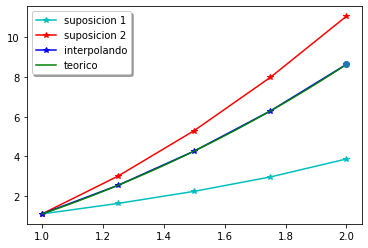

In [12]:
# esta funcion no se si esta bien , pero lo he probado y me resulta cosas raras pero muy raras 
def shooting_method(Func=None,ta=0,alpha=0,tb=0,beta=0,npaso=20,supos1=0,supos2=0):
    '''
    La siguiente funcion requiere tener el runge kutta que resuelve multiple ( OJO )
    Resuelve un tipo de ecuacion diferenicial , la lineal de "diff2x = f(t,x,x')" .
    ya que esas funciones se pueden desdoblar en ecuaciones 2 ecuaciones de primer grado . 
    haciendo x = x1 y x'=x2
    
    Esta funcion recibe como parametros
    - F = Funcion que se refiere al sistema de ecuaciones desdoblado 
    - ta ,alpha,tb , beta = se refiere a las condiciones de dirichlet y(ta) = alpha , y(tb) = beta 
    - npaso = esto se refiere al numero de pasos para hacer la evaluacion con runge kuta 
    - supos1,supos2 = las dos suposiciones de y'(ta) = supos1 or supos2 . 
    
    Esta funcion retorna un array con 4 filas , la primera fila es los puntos donde se hace las predicciones
    la ssegunda fila es lo hallado con la primera suposicion 
    la tercera fila es lo hallado con la suposicion 2 y la cuarta fila es luego de hacer la interpolacion lineal y resolver
    el sistema con la suposicion 

    '''
    # recordar que RK4_system devuelve un array de 3 columnas , primera columna los valores evaluados en el tiempo
    # segunda columna los valores predichos para x1 en esos tiempos 
    # tercera columan los valores predichos para x2 en esos tiempos 
    
    # resolvemos para la primera suposicion
    respuesta1 = RK4_system(F=Func,t0=ta,X0=np.array([alpha,supos1]),limsup=tb,nstep=npaso).T
    # resolvemos para la segunda suposicion 
    respuesta2 = RK4_system(F=Func,t0=ta,X0=np.array([alpha,supos2]),limsup=tb,nstep=npaso).T

    
    # los valores finales que se obtienen para comparar con beta son 
    beta1 = respuesta1[1][-1]
    beta2 = respuesta2[1][-1]

    supos3 = supos1 + (supos2-supos1)/(beta2-beta1) * (beta-beta1)
   
    # finalmente resolvemos para ese suposicion 3 
    respuesta3 = RK4_system(F=Func,t0=ta,X0=np.array([alpha,supos3]),limsup=tb,nstep=npaso).T

    # finalmente retornamos lo que prometimos en la descripcion inicial 
    return np.array([respuesta1[0],respuesta1[1],respuesta2[1],respuesta3[1]] , dtype=np.float64)

# Primero definimos nuestra funcion diff2x = f(x,y,y')
# diff2x = np.e**(t) - 3*np.sin(t) + diff1x - x

# desdoblamos la funcion de la siguiente manera 
# funcion retorna un array 
def funcion1(t,X):
    x1 = X[0]
    x2 = X[1]
    diffx1 = x2
    diffx2 = np.e**(t)-3*np.sin(t)+x2-x1
    return np.array([diffx1,diffx2],dtype=np.float64)

def analitico(t):
    return np.float64(np.e**(t)-3*np.cos(t))

# vamos a resolver el mismo problema que hicimos para las condiciones de dirichlet visto arriba 
resultado2 = shooting_method(Func=funcion1,ta=1,alpha=1.09737491,tb=2,beta=8.63749661,npaso=4,supos1=2,supos2=7)
plt.plot(resultado2[0],resultado2[1],'-*c',label="suposicion 1")
plt.plot(resultado2[0],resultado2[2],'-*r',label="suposicion 2")
plt.plot(resultado2[0],resultado2[3],'-*b',label="interpolando")
plt.plot(np.linspace(1,2,50),analitico(np.linspace(1,2,50)),'g',label="teorico")
plt.plot(2,8.63749661,'o')
plt.legend( loc='upper left', shadow=True)
print(resultado2[3][-1],"resultado en tb" ) 

# Resolvere el ejercicio 1 de la tarea 
<img src="ejercicio1.png">

In [ ]:
# solucion analitica la hallamos usando sympy
from sympy import *
x , h,T_a = symbols("x,h,T_a")
T = symbols('T', cls=Function)
h = 0.01
T_a = 20
eq = Eq(Derivative(T(x),x,x) , -h*(T_a-T(x) ) )
ics = {T(0): 40, T(10): 200}
resuelto = dsolve(eq,ics=ics)
resuelto

In [ ]:
def analitico(x):
    return np.float64(73.4522786865455*np.e**(0.1*𝑥)+20.0-53.4522786865455*np.e**(-0.1*𝑥) )

analitico(0),analitico(10) # para comprobar

//////////////// Pregunta 1 resuelto por Dirichlet//////////////////
//////////////// Pregunta 1 resuelto por shooting//////////////////


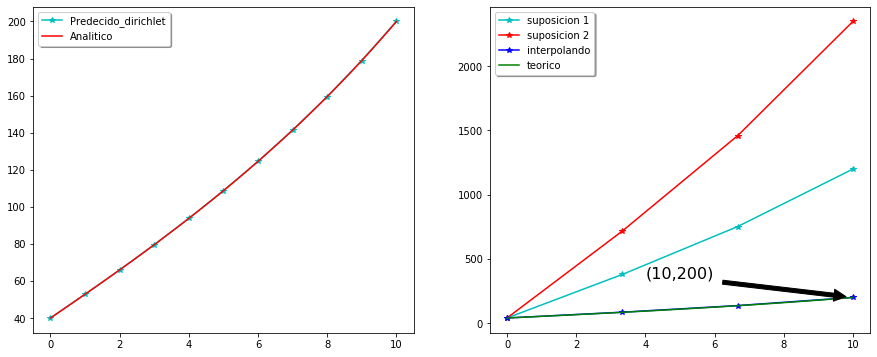

In [26]:
print("//////////////// Pregunta 1 resuelto por Dirichlet//////////////////")
'''
Queremos resolver el problema diff2T = -h'Ta + h'T
con T(0) = 40 y T(10) = 200 y tomar 11 puntos incluyendo a y b , para que mi paso sea igual a "1" , Asi que escojo n = 10
Tambien h'= 0.01 , Ta = 20
--- Por lo tanto estos son nuestros parametros 
- u(t) = -h'Ta
- v(t) = h'
- w(t) = 0
- n=10
- ta = 0 , alpha = 40 , tb = 10 , beta = 200
'''
Ta = 20
hprima = 0.01
def upara(x):
    return np.float64(-hprima*Ta)
def vpara(x):
    return np.float64(hprima)
def wpara(x):
    return np.float64(0)
def analitico(x):
    return np.float64(73.4522786865455*np.e**(0.1*x)+20.0-53.4522786865455*np.e**(-0.1*x) )

# resolvemos por dirichlet
resultado1 = sol_EDO_Diri_or_New(u=upara,v=vpara,w=wpara,ta=0,alpha=40,tb=10,beta=200,n=10,tipo="dirichlet",
                           analitic_solution=analitico)

print("//////////////// Pregunta 1 resuelto por shooting//////////////////")

# Primero definimos nuestra funcion diff2T = f(x,T,T')
# diff2T = -h'Ta + h'T
# ta = 0 , alpha = 40 , tb = 10 , beta = 200
# desdoblamos la funcion de la siguiente manera 
# funcion retorna un array 

def funcion_desdoblado(x,T):
    T1 = T[0]
    T2 = T[1]
    diffT1 = T2
    diffT2 = -hprima*Ta + hprima*T1
    return np.array([diffT1,diffT2],dtype=np.float64)

def analitico(x):
    return np.float64(73.4522786865455*np.e**(0.1*𝑥)+20.0-53.4522786865455*np.e**(-0.1*𝑥) )

# vamos a resolver con el metodo de shooting 
resultado2 = shooting_method(Func=funcion_desdoblado,ta=0,alpha=40,tb=10,beta=200,npaso=3,supos1=100,supos2=200)

# graficaremos nuestros resultados 
fig, axes = plt.subplots(nrows=1,ncols=2 , figsize = (15,6)) 
axes[0].plot(resultado1[0],resultado1[1],'-*c',label="Predecido_dirichlet")
axes[0].plot(np.linspace(0,10,50),analitico(np.linspace(0,10,50)),'r',label="Analitico")
axes[0].legend( loc='upper left', shadow=True)

axes[1].plot(resultado2[0],resultado2[1],'-*c',label="suposicion 1")
axes[1].plot(resultado2[0],resultado2[2],'-*r',label="suposicion 2")
axes[1].plot(resultado2[0],resultado2[3],'-*b',label="interpolando")
axes[1].plot(np.linspace(0,10,50),analitico(np.linspace(0,10,50)),'g',label="teorico")
axes[1].annotate(f"({10},{200})", xy=(10,200), xytext=(4, 350),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=16)
axes[1].legend( loc='upper left', shadow=True)
plt.show()

# Problema numero 2 dejado por el profesor 

<img src="ejercicio2_newman.png">

In [ ]:
# solucion analitica la hallamos usando sympy
from sympy import *
x , h,T_infi = symbols("x,h,T_infi")
T = symbols('T', cls=Function)
h = 0.01
T_infi = 40
eq = Eq(Derivative(T(x),x,x) , -h*(T_infi-T(x) ) )
ics = {T(x).diff(x).subs(x, 0): 10, T(10): 200}
resuelto = dsolve(eq,ics=ics)
resuelto

In [28]:
# comprobamos
def analitico(x):
    return np.float64(63.7646340953225*np.e**(0.1*x)+40.0-36.2353659046775*np.e**(-0.1*x) )

def analitico_deriv(x):
    return np.float64(63.7646340953225*(0.1)*np.e**(0.1*x)-36.2353659046775*(-0.1)*np.e**(-0.1*x) )

analitico_deriv(0),analitico(10) # para comprobar

(10.0, 199.99999999999972)

//////////////// Pregunta 2 resuelto por newman left//////////////////


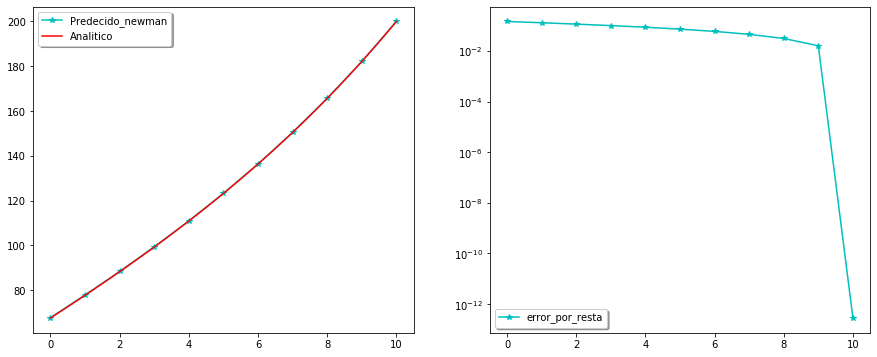

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 67.67462043,  77.81299353,  88.32949657,  99.32929457,
        110.92238552, 123.22470033, 136.35926213, 150.45741656,
        165.66014516, 182.1194752 , 200.        ]),
 array([ 67.52926819,  77.68370428,  88.21529154,  99.22943365,
        110.83636384, 123.15224816, 136.30034814, 150.41225436,
        165.62920354, 182.10349202, 200.        ]))

In [19]:
print("//////////////// Pregunta 2 resuelto por newman left//////////////////")
'''
Queremos resolver el problema diff2T = -h'Tinfi + h'T
con T'(0) = 10 y T(10) = 200 y tomar 11 puntos incluyendo a y b , para que mi paso sea igual a "1" , Asi que escojo n = 10
Tambien h'= 0.01 , Tinfi = 40
--- Por lo tanto estos son nuestros parametros 
- u(t) = -h'Tinfi
- v(t) = h'
- w(t) = 0
- n=10
- ta = 0 , alpha = 10 , tb = 10 , beta = 200
'''
Tinfi = 40
hprima = 0.01
def upara(x):
    return np.float64(-hprima*Tinfi)
def vpara(x):
    return np.float64(hprima)
def wpara(x):
    return np.float64(0)
def analitico(x):
    return np.float64(63.7646340953225*np.e**(0.1*𝑥)+40.0-36.2353659046775*np.e**(-0.1*𝑥) )

resultado3 = sol_EDO_Diri_or_New(u=upara,v=vpara,w=wpara,ta=0,alpha=10,tb=10,beta=200,n=10,tipo="newman_left",
                           analitic_solution=analitico)


# graficaremos nuestros resultados 
fig, axes = plt.subplots(nrows=1,ncols=2 , figsize = (15,6)) 
axes[0].plot(resultado3[0],resultado3[1],'-*c',label="Predecido_newman")
axes[0].plot(np.linspace(0,10,50),analitico(np.linspace(0,10,50)),'r',label="Analitico")
axes[0].legend( loc='upper left', shadow=True)


axes[1].plot(resultado3[0],abs(resultado3[3]),'-*c',label="error_por_resta")
axes[1].legend( loc='lower left', shadow=True)
axes[1].set_yscale("log")

plt.show()

resultado3[0],resultado3[1] ,resultado3[2] 

# Problema de autovalores con metodo de potencias 

<img src="potencias.png">

In [20]:
def eigevalores_potencias(A=None,X=None,kmax=100):
    '''
    Funcion que usa el metodo de potencias para hallar el autovalor dominante y su respectivo eingevalor de una matriz 
    - A = matriz de nxn
    - X = vector inicial de nx1 , (Ojo debes mandar copias si no quieres modificar tu X)
    - kmax = cuantas iteraciones se quiere hacer ,por defecto es 100
    Esta funcion retorna el autovalor y el respectivo autovecto 
    '''
    for k in range(0,kmax):
        Y = A.dot(X)
        autovalor = Y[0] / X[0]
        X = Y/Y[1] # esto lo hago con el fin de que mi matriz no diverja  
    return X , autovalor

#### Tarea 
<img src="ejercicio4.png">

# Primer matriz lo resolvemos analiticamente(usando metodos alternativos ) 

In [ ]:
# resolvemos analiticamente usando sympy 
from sympy import *
init_printing(use_unicode=True) # La salida sera en unicode / en latex 

In [ ]:
# Primero
M1 = Matrix([[-4,10],[7,5]])
M1

In [ ]:
M1.eigenvects() 

### Probamos nuestro codigo para la matriz

In [24]:
print("//////////////// Pregunta de autovalores //////////////////")
A1 = np.array([[-4,10],[7,5]],dtype=np.float64)
X1 = np.array([[1/2],[1]],dtype=np.float64)
matriz , autovalor = eigevalores_potencias(A=A1,X=X1,kmax=100)
print(f"Para la primera matriz tenemos el autovector \n{matriz} \n con el autovalor dominante {autovalor}")

//////////////// Pregunta de autovalores //////////////////
Para la primera matriz tenemos el autovector 
[[0.71427953]
 [1.        ]] 
 con el autovalor dominante [9.99986542]


# Segunda matriz resolvemos analiticamente(usando metodos alternativos )

In [ ]:
# Primero
M2 = Matrix([[1,2,-2],[-2,5,-2],[-6,6,-3]])
M2

In [ ]:
M2.eigenvects() 

In [25]:
A2 = np.array([[1,2,-2],[-2,5,-2],[-6,6,-3]],dtype=np.float64)
X2 = np.array([[2],[1/2],[1]],dtype=np.float64)
matriz , autovalor = eigevalores_potencias(A=A2,X=X2,kmax=100)
matriz , autovalor
print(f"Para la segunda matriz tenemos el autovector \n{matriz} \n con el autovalor dominante {autovalor}")

Para la segunda matriz tenemos el autovector 
[[4.]
 [1.]
 [2.]] 
 con el autovalor dominante [18.]
